<br><br>
<p style="font-size:30px"> <b> Classification Model Development | Apprentice Chef Case </b> </p>

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /> 
Jisung Jung <br> 
Masters of Business Analytics <br>
Machine Learning - DAT-5303 | FMsBA2 <br>
Hult International Business School <br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>
<p style="font-size:20px"><strong> Analytical Objectives </strong> </p>
<br>
<li> Analyze datasets </li> 
<li> Develop top insights </li>
<li> Build a machine learning model to predict which customers will subscribe to 'Halfway There' service. </li>
<br>

<p style="font-size:20px"><strong> Basic Modeling Strategy for BINOMIAL Response Variable: </strong> </p>
<br>
<strong>Prepare for Model Development</strong> <br>
Split dataset into training and testing sets<br>

<strong>Model Development in statsmodels</strong><br>
Experiment with different variable combinations in linear regression (OLS) and analyze results and save its variables as a new dataset<br>

<strong>Develop Candidate Models</strong><br>
Take model(s) with highest predictive power<br>

<strong>Prepare for Model Development on New Dataset</strong><br>
Split new dataset into training and testing sets<br>

<strong>Model Tournament</strong><br>
Experiment with different (regression) model types from scikit-learn. Also try to adjust the optional arguments of the permitted model types.<br><br>


<u> <b> Types of Machine Learning Model for experiment </b> </u>

<li> Logistic Regression </li>
<li> Lasso Regression (Classification) </li>
<li> K-Nearest Neighbors Classification (KNN) </li>
<li> Classification Trees </li>
<li> Random Forest (Classification) </li>
<li> Gradient Boosted Models (GBM) </li>

<br>

<u> <b> Output table of candidate models contains the following information: </b> </u>

<li> Model Name </li>
<li> Training Accuracy </li>
<li> Testing Accuracy </li>
<li> AUC Score </li>
<li> Confusion Matrix </li>
<li> It is clear which model is your final model (label it accordingly) </li>
<br>

<u> <b> NOTE </b> </u> <br>
<li> target variable is stratified  </li>
<li> max_depth for classification tree, random forest, and gradient boosted machine (GBM) models is less than or equal to 8  </li>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Prepare for Model Development

In [1]:
# Import libraries
import random as rand # random number gen
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf                # logistic regression
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.preprocessing import StandardScaler     # standard scaler

# CART model packages
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV  # hyperparameter tuning
from sklearn.metrics import make_scorer                 # customizable scorer

# Ensemble Modeling
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying the path and file name
file = "./datasets/Apprentice_Chef_Dataset.xlsx"

# reading the file into Python
apprenticechef = pd.read_excel(file)

# checking the file
apprenticechef.head(n = 5)

REVENUE  CROSS_SELL_SUCCESS               NAME                     EMAIL FIRST_NAME FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED
0    393.0                   1            Saathos  saathos@unitedhealth.com    Saathos     Saathos                   14                   6                           12                         10                    48.00              1                          3                         1                       1          5              2            0                 0                2               0                    0               33.4                   1                        0                   1                    17                    0
1   1365.0                   1    Alysanne Osgrey    alysanne.osgrey@ge.org   Alysanne      Osgrey                   87                   3                            8                          8                    40.35              1                          0                         0                       1          5              1           12                 0                2               0                    0               84.8                   1                        0                   3                    13                  170
2    800.0                   1     Edwyd Fossoway    edwyd.fossoway@jnj.com      Edwyd    Fossoway                   15                   7                           11                          5                    19.77              1                          3                         0                       1          6              1            1                 0                1               0                    0               63.0                   1                        0                   2                    16                    0
3    600.0                   1  Eleyna Westerling  eleyna.westerling@ge.org     Eleyna  Westerling                   13                   6                           11                          5                    90.00              1                          2                         0                       1          6              1           14                 0                3               0                    0               43.8                   1                        0                   2                    14                    0
4   1490.0                   1      Elyn Norridge     elyn.norridge@jnj.com       Elyn    Norridge                   47                   8                            6                         10                    40.38              1                          0                         0                       0          5              1            5                 0                8               0                    0               84.8                   1                        1                   3                    12                  205

### Encoding Categorical Data

In [2]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in apprenticechef.iterrows():
    
    # splitting email domain at '@'
    split_email = apprenticechef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    
# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# STEP 2: concatenating with original DataFrame

# renaming column to concatenate
email_df.columns = ['0', 'TEMP1_DOMAINS']

# concatenating personal_email_domain with friends DataFrame
apprenticechef = pd.concat([apprenticechef, email_df['TEMP1_DOMAINS']], axis = 1)

# printing value counts of personal_email_domain
apprenticechef.loc[: ,'TEMP1_DOMAINS'].value_counts()


# STEP 3: Aggregate the email domains into domain groups

# email domain types
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com', '@boeing.com',
                              '@caterpillar.com', '@chevron.com', '@cisco.com',
                              '@cocacola.com', '@disney.com', '@dupont.com',
                              '@exxon.com', '@ge.org', '@goldmansacs.com',
                              '@homedepot.com', '@ibm.com', '@intel.com', '@jnj.com',
                              '@jpmorgan.com', '@mcdonalds.com', '@merck.com',
                              '@microsoft.com', '@nike.com', '@pfizer.com', '@pg.com',
                              '@travelers.com', '@unitedtech.com', '@unitedhealth.com',
                              '@verizon.com', '@visa.com', '@walmart.com']
personal_email_domains  = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email_domains  = ['@me.com', '@aol.com', '@hotmail.com', 
                       '@live.com', '@msn.com', '@passport.com']

# placeholder list
placeholder_lst = []

# looping to group observations by domain type
for domain in apprenticechef['TEMP1_DOMAINS']:
    if '@' + domain in professional_email_domains:
        placeholder_lst.append('professional')
            
    elif '@' + domain in personal_email_domains:
        placeholder_lst.append('personal')

    elif '@' + domain in junk_email_domains:
        placeholder_lst.append('junk')

    else:
        print('Unknown')

# concatenating with original DataFrame
apprenticechef['DOMAIN_GROUP'] = pd.Series(placeholder_lst)

# checking results
print(f"""
Domain Group
------------
{apprenticechef['DOMAIN_GROUP'].value_counts()}
""")

# STEP 4: remove .com and .org from domain names

placeholder_lst = []

for index, col in apprenticechef.iterrows():
    if ".com" in apprenticechef.loc[index, 'TEMP1_DOMAINS']:
        split_email = apprenticechef.loc[index, 'TEMP1_DOMAINS'].replace(".com", "")
    if ".org" in apprenticechef.loc[index, 'TEMP1_DOMAINS']:
        split_email = apprenticechef.loc[index, 'TEMP1_DOMAINS'].replace(".org", "")
    placeholder_lst.append(split_email)

domain_df = pd.DataFrame(placeholder_lst)
domain_df.columns = ['TEMP2_DOMAINS']

apprenticechef = pd.concat([apprenticechef, domain_df['TEMP2_DOMAINS']], axis = 1)

# printing value counts of personal_email_domain
print(f"""
Domain Name
-----------
{apprenticechef.loc[: ,'TEMP2_DOMAINS'].value_counts()}
""")


Domain Group
------------
personal        861
professional    696
junk            389
Name: DOMAIN_GROUP, dtype: int64


Domain Name
-----------
gmail           303
protonmail      284
yahoo           274
msn              72
aol              69
passport         64
hotmail          63
live             62
me               59
amex             30
merck            28
mcdonalds        28
jnj              28
cocacola         28
nike             27
apple            27
dupont           26
ibm              26
ge               26
chevron          25
microsoft        25
exxon            24
unitedhealth     24
travelers        24
boeing           23
verizon          22
pg               22
mmm              22
caterpillar      22
disney           21
walmart          21
pfizer           20
visa             20
jpmorgan         19
cisco            18
unitedtech       18
goldmansacs      18
intel            17
homedepot        17
Name: TEMP2_DOMAINS, dtype: int64



**NOTE:** gender list has created by using python gender guesser function and referring game of throne characters dataset from [GitHub repository](https://github.com/benkahle/bayesianGameofThrones) and [Reddit](https://www.reddit.com/r/asoiaf/comments/9nwpoe/spoilers_extended_spreadsheet_of_all_asoiaf/)

In [3]:
# gender list reading the file into Python
gender = ['male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'unknown', 'male', 'female', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'female', 'female', 'male', 'female', 'male', 'male', 'unknown', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'female', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'female', 'female', 'male', 'female', 'female', 'female', 'male', 'female', 'female', 'male', 'female', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'unknown', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'female', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'unknown', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'female', 'male', 'female', 'female', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'unknown', 'unknown', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'unknown', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'unknown', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'unknown', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'female', 'female', 'female', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'female', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'male']

# concatenate into dataset
gender_df = pd.DataFrame(gender)
gender_df.columns = ['GENDER']

apprenticechef = pd.concat([apprenticechef, gender_df['GENDER']], axis = 1)

# printing value counts of GENDER
apprenticechef['GENDER'].value_counts()

male       1515
female      404
unknown      27
Name: GENDER, dtype: int64

In [4]:
# one hot encoding categorical variables
one_hot_DOMAINS  = pd.get_dummies(apprenticechef['TEMP2_DOMAINS'])
one_hot_DOMAIN_GROUP  = pd.get_dummies(apprenticechef['DOMAIN_GROUP'])
one_hot_GENDER  = pd.get_dummies(apprenticechef['GENDER'])

# dropping categorical variables after they've been encoded
apprenticechef = apprenticechef.drop('TEMP1_DOMAINS', axis = 1)
apprenticechef = apprenticechef.drop('TEMP2_DOMAINS', axis = 1)
apprenticechef = apprenticechef.drop('DOMAIN_GROUP', axis = 1)
apprenticechef = apprenticechef.drop('GENDER', axis = 1)

# joining codings together
apprenticechef = apprenticechef.join([one_hot_DOMAINS])
apprenticechef = apprenticechef.join([one_hot_DOMAIN_GROUP])
apprenticechef = apprenticechef.join([one_hot_GENDER])

### Develop a number of names feature.

In [5]:
#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))
        

# calling text_split_feature
text_split_feature(col = 'NAME',
                   df  = apprenticechef)

# checking results
apprenticechef['number_of_names'].value_counts().sort_index()

1     591
2    1201
3      98
4       9
5      35
6      12
Name: number_of_names, dtype: int64

In [6]:
# saving feature-rich dataset in Excel
apprenticechef.to_excel('./datasets/apprenticechef_feature_class.xlsx',
                        index = False)

In [7]:
apprenticechef.describe(include = 'number').round(decimals = 2)

REVENUE  CROSS_SELL_SUCCESS  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED     amex      aol    apple   boeing  caterpillar  chevron    cisco  cocacola   disney   dupont    exxon       ge    gmail  goldmansacs  homedepot  hotmail      ibm    intel      jnj  jpmorgan     live  mcdonalds       me    merck  microsoft      mmm      msn     nike  passport   pfizer       pg  protonmail  travelers  unitedhealth  unitedtech  verizon     visa  walmart    yahoo    junk  personal  professional   female     male  unknown  number_of_names
count  1946.00             1946.00              1946.00              1946.0                      1946.00                    1946.00                  1946.00        1946.00                    1946.00                   1946.00                 1946.00    1946.00        1946.00      1946.00           1946.00          1946.00         1946.00              1946.00            1946.00             1946.00                  1946.00             1946.00               1946.00              1946.00  1946.00  1946.00  1946.00  1946.00      1946.00  1946.00  1946.00   1946.00  1946.00  1946.00  1946.00  1946.00  1946.00      1946.00    1946.00  1946.00  1946.00  1946.00  1946.00   1946.00  1946.00    1946.00  1946.00  1946.00    1946.00  1946.00  1946.00  1946.00   1946.00  1946.00  1946.00     1946.00    1946.00       1946.00     1946.00  1946.00  1946.00  1946.00  1946.00  1946.0   1946.00       1946.00  1946.00  1946.00  1946.00          1946.00
mean   2107.29                0.68                74.63                 4.9                         6.98                       5.38                    99.60           0.88                       1.40                      0.17                    0.71       5.52           1.48        11.33              1.49             2.97            0.36                 0.11             150.56                4.44                     0.60                2.79                 13.51               106.43     0.02     0.04     0.01     0.01         0.01     0.01     0.01      0.01     0.01     0.01     0.01     0.01     0.16         0.01       0.01     0.03     0.01     0.01     0.01      0.01     0.03       0.01     0.03     0.01       0.01     0.01     0.04     0.01      0.03     0.01     0.01        0.15       0.01          0.01        0.01     0.01     0.01     0.01     0.14     0.2      0.44          0.36     0.21     0.78     0.01             1.83
std    1138.29                0.47                55.31                 2.5                         2.28                       3.04                    62.34           0.33                       1.55                      0.43                    0.45       0.58           0.53        13.57              2.32             2.74            0.48                 0.32              49.45                1.55                     0.64                0.76                  2.33               181.01     0.12     0.18     0.12     0.11         0.11     0.11     0.10      0.12     0.10     0.11     0.11     0.11     0.36         0.10       0.09     0.18     0.11     0.09     0.12      0.10     0.18       0.12     0.17     0.12       0.11     0.11     0.19     0.12      0.18     0.10     0.11        0.35       0.11          0.11        0.10     0.11     0.10     0.10     0.35     0.4      0.50          0.48     0.41     0.42     0.12             0.78
min     131.00                0.00                11.00                 1.0                         1.00                       1.00                    10.33           0.00                       0.00                      0.00       

CONTINUOUS
*   REVENUE
*   TOTAL_MEALS_ORDERED
*   WEEKLY_PLAN
*   AVG_TIME_PER_SITE_VISIT
*   AVG_PREP_VID_TIME
*   TOTAL_PHOTOS_VIEWED

INTERVAL/COUNT
*   UNIQUE_MEALS_PURCH
*   CONTACTS_W_CUSTOMER_SERVICE
*   PRODUCT_CATEGORIES_VIEWED
*   CANCELLATIONS_BEFORE_NOON
*   CANCELLATIONS_AFTER_NOON
*   TASTES_AND_PREFERENCES (binary)
*   MOBILE_NUMBER 
*   PC_LOGINS
*   MOBILE_LOGINS
*   EARLY_DELIVERIES
*   LATE_DELIVERIES
*   PACKAGE_LOCKER (binary)
*   REFRIGERATED_LOCKER (binary)
*   LARGEST_ORDER_SIZE
*   MASTER_CLASSES_ATTENDED
*   MEDIAN_MEAL_RATING
*   AVG_CLICKS_PER_VISIT
*   number_of_names

DUMMY TRANSFORMED DATA
*   EMAIL DOMAINS (ge, apple, nike, fedex, ...)
*   DOMAIN_GROUP  (personal, professional, junk)
*   GENDER (male, female, unknown)



## Simple Modeling

### Preparing Explanatory and Response Data

In [8]:
# preparing explanatory variable data
apprenticechef_data = apprenticechef.drop(['CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'],
                                            axis = 1)
# ols_data = apprenticechef[x_variables]

# preparing response variables
apprenticechef_target = apprenticechef.loc[ : , 'CROSS_SELL_SUCCESS']

In [9]:
###############################################
## setting up more than one train-test split ##
###############################################

# In train-test split, random_state is set to 219 and test_size is set to 0.25

# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            apprenticechef_data,         # x-variables
            apprenticechef_target,   # y-variable
            test_size = 0.25,
            random_state = 219,
            stratify = apprenticechef_target)

# merging training data for statsmodels
apprenticechef_train = pd.concat([X_train, y_train], axis = 1)

print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



### Logistic Regression Model in statsmodels

In [10]:
for val in apprenticechef_data:
    print(f" {val} + ")

 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 amex + 
 aol + 
 apple + 
 boeing + 
 caterpillar + 
 chevron + 
 cisco + 
 cocacola + 
 disney + 
 dupont + 
 exxon + 
 ge + 
 gmail + 
 goldmansacs + 
 homedepot + 
 hotmail + 
 ibm + 
 intel + 
 jnj + 
 jpmorgan + 
 live + 
 mcdonalds + 
 me + 
 merck + 
 microsoft + 
 mmm + 
 msn + 
 nike + 
 passport + 
 pfizer + 
 pg + 
 protonmail + 
 travelers + 
 unitedhealth + 
 unitedtech + 
 verizon + 
 visa + 
 walmart + 
 yahoo + 
 junk + 
 personal + 
 professional +

In [11]:
# instantiating a logistic model object
logistic_full = smf.logit(formula = """  CROSS_SELL_SUCCESS ~ 
                                         REVENUE + CONTACTS_W_CUSTOMER_SERVICE +  PRODUCT_CATEGORIES_VIEWED + 
                                         AVG_TIME_PER_SITE_VISIT + MOBILE_NUMBER + CANCELLATIONS_BEFORE_NOON + 
                                         CANCELLATIONS_AFTER_NOON + TASTES_AND_PREFERENCES + PC_LOGINS + 
                                         MOBILE_LOGINS + WEEKLY_PLAN + EARLY_DELIVERIES + LATE_DELIVERIES + 
                                         PACKAGE_LOCKER + REFRIGERATED_LOCKER + MASTER_CLASSES_ATTENDED + 
                                         MEDIAN_MEAL_RATING + AVG_CLICKS_PER_VISIT + TOTAL_PHOTOS_VIEWED + 
                                         TOTAL_MEALS_ORDERED + AVG_PREP_VID_TIME + UNIQUE_MEALS_PURCH + 
                                         LARGEST_ORDER_SIZE + amex + aol + apple + boeing + caterpillar + 
                                         chevron + cisco + cocacola + disney + dupont + exxon + ge + gmail + 
                                         goldmansacs + homedepot + hotmail + ibm + intel + jnj + jpmorgan + 
                                         live + mcdonalds + me + merck + microsoft + mmm + msn + nike + 
                                         passport + pfizer + pg + protonmail + travelers + unitedhealth + unitedtech + 
                                         verizon + visa + walmart + yahoo + junk + personal + professional + 
                                         female + male + unknown + number_of_names""",
                                         data = apprenticechef_train)

# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

         Current function value: 0.515797
         Iterations: 35


C:\Applications\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1394
Method:                           MLE   Df Model:                           64
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                  0.1786
Time:                        22:05:11   Log-Likelihood:                -752.55
converged:                      False   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 5.448e-37
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.5530   3.87e+06  -4.01e-07      1.000   -7.59e+06    7.59e+06
REVENUE                        -0.0002   9.15e-05     -2.401      0.016      -0.000   -4.03e-05
CONTACTS_W_CUSTOMER_SERVICE     0.0533      0.029      1.820      0.069      -0.004       0.111
PRODUCT_CATEGORIES_VIEWED      -0.0139      0.021     -0.654      0.513      -0.056       0.028
AVG_TIME_PER_SITE_VISIT      9.909e-05      0.001      0.094      0.925      -0.002       0.002
MOBILE_NUMBER                   0.8698      0.187      4.661      0.000       0.504       1.236
CANCELLATIONS_BEFORE_NOON       0.2912      0.048      6.114      0.000       0.198       0.385
CANCELLATIONS_AFTER_NOON       -0.2655      0.148     -1.796      0.073      -0.555       0.024
TASTES_AND_PREFERENCES          0.3984      0.142      2.806      0.005       0.120       0.677
PC_LOGINS                       0.2586      0.112      2.306      0.021       0.039       0.478
MOBILE_LOGINS                  -0.1954      0.123     -1.582      0.114      -0.437       0.047
WEEKLY_PLAN                     0.0058      0.005      1.201      0.230      -0.004       0.015
EARLY_DELIVERIES                0.0698      0.029      2.415      0.016       0.013       0.127
LATE_DELIVERIES                 0.0167      0.023      0.714      0.475      -0.029       0.062
PACKAGE_LOCKER                 -0.0101      0.154     -0.065      0.948      -0.312       0.292
REFRIGERATED_LOCKER             0.5433      0.246      2.208      0.027       0.061       1.025
MASTER_CLASSES_ATTENDED         0.2143      0.120      1.785      0.074      -0.021       0.450
MEDIAN_MEAL_RATING              0.1166      0.174      0.672      0.502      -0.224       0.457
AVG_CLICKS_PER_VISIT           -0.0315      0.053     -0.597      0.551      -0.135       0.072
TOTAL_PHOTOS_VIEWED            -0.0002      0.000     -0.509      0.610      -0.001       0.001
TOTAL_MEALS_ORDERED             0.0003      0.002      0.188      0.851      -0.003       0.003
AVG_PREP_VID_TIME               0.0047      0.003      1.726      0.084      -0.001       0.010
UNIQUE_MEALS_PURCH             -0.0183      0.027     -0.678      0.498      -0.071       0.035
LARGEST_ORDER_SIZE             -0.0757      0.072     -1.050      0.294      -0.217       0.066
amex                           -0.1292   3.83e+06  -3.38e-08      1.000    -7.5e+06     7.5e+06
aol                            -0.7661        nan        nan        nan         nan         nan
apple                          -1.5950   4.31e+06   -3.7e-07      1.000   -8.44e+06    8.44e+06
boeing                         -1.4839   3.36e+06  -4.41e-07      1.000   -6.59e+06    6.59e+06
caterpillar                    -1.0305   3.67e+06  -2.81e-07      1.000    -7.2e+06     7.2e+06
chevron                        -1.9536   3.68e+06  -5.31e-07      1.000   -7.21e+06    7.21e+06
cisco                          -1.5473   3.01e+06  -5.15e-07      1.000  

**Develop a model where all features are significant based on their p-values.**

Based on the output above, remove all variables that were deemed insignificant based on their p-values. Once finished, check the p-values again to ensure that all variables are still significant.

Note: 'nan' is also considered insignificant (excluding the intercept, which must always be included).

In [12]:
# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """  CROSS_SELL_SUCCESS ~
                                     REVENUE + MOBILE_NUMBER + 
                                     CANCELLATIONS_BEFORE_NOON +  
                                     TASTES_AND_PREFERENCES + PC_LOGINS +   
                                     REFRIGERATED_LOCKER +      
                                     personal + professional + number_of_names
                                     """,
                                     data = apprenticechef_train)


# fitting the model object
logit_sig = logit_sig.fit()


# checking the results SUMMARY
logit_sig.summary()

Optimization terminated successfully.
         Current function value: 0.545053
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1449
Method:                           MLE   Df Model:                            9
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                  0.1320
Time:                        22:05:11   Log-Likelihood:                -795.23
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 5.051e-47
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -4.1009      0.672     -6.100      0.000      -5.419      -2.783
REVENUE                    2.518e-05   5.55e-05      0.454      0.650   -8.35e-05       0.000
MOBILE_NUMBER                 0.8553      0.176      4.871      0.000       0.511       1.200
CANCELLATIONS_BEFORE_NOON     0.2750      0.046      5.939      0.000       0.184       0.366
TASTES_AND_PREFERENCES        0.3934      0.135      2.922      0.003       0.130       0.657
PC_LOGINS                     0.2173      0.107      2.039      0.041       0.008       0.426
REFRIGERATED_LOCKER           0.5426      0.208      2.612      0.009       0.135       0.950
personal                      1.2980      0.156      8.308      0.000       0.992       1.604
professional                  1.8955      0.171     11.109      0.000       1.561       2.230
number_of_names               0.5459      0.094      5.806      0.000       0.362       0.730
=============================================================================================
"""

In [13]:
# instantiating a logistic regression model object
logit_sig2 = smf.logit(formula = """ CROSS_SELL_SUCCESS ~
                                     REVENUE + MOBILE_NUMBER + 
                                     CANCELLATIONS_BEFORE_NOON +  
                                     TASTES_AND_PREFERENCES + PC_LOGINS +   
                                     REFRIGERATED_LOCKER + EARLY_DELIVERIES + MASTER_CLASSES_ATTENDED +
                                     personal + professional + number_of_names
                                     """,
                                     data = apprenticechef_train)

# fitting the model object
logit_sig2 = logit_sig2.fit()


# checking the results SUMMARY
logit_sig2.summary()

Optimization terminated successfully.
         Current function value: 0.541443
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1447
Method:                           MLE   Df Model:                           11
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                  0.1378
Time:                        22:05:11   Log-Likelihood:                -789.96
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 8.542e-48
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -4.2975      0.680     -6.323      0.000      -5.630      -2.965
REVENUE                   -4.128e-05   6.16e-05     -0.670      0.503      -0.000    7.94e-05
MOBILE_NUMBER                 0.8778      0.176      4.974      0.000       0.532       1.224
CANCELLATIONS_BEFORE_NOON     0.2765      0.046      5.954      0.000       0.186       0.368
TASTES_AND_PREFERENCES        0.3886      0.135      2.871      0.004       0.123       0.654
PC_LOGINS                     0.2285      0.107      2.136      0.033       0.019       0.438
REFRIGERATED_LOCKER           0.5262      0.209      2.516      0.012       0.116       0.936
EARLY_DELIVERIES              0.0614      0.028      2.218      0.027       0.007       0.116
MASTER_CLASSES_ATTENDED       0.2537      0.109      2.333      0.020       0.041       0.467
personal                      1.3140      0.157      8.353      0.000       1.006       1.622
professional                  1.9155      0.172     11.157      0.000       1.579       2.252
number_of_names               0.5507      0.094      5.886      0.000       0.367       0.734
=============================================================================================
"""

### Creating candidate variable sets

In [14]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
                   'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_BEFORE_NOON',
                   'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS',
                   'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 
                   'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE',
                   'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT',
                   'TOTAL_PHOTOS_VIEWED', 
                   'amex', 'aol', 'apple', 'boeing', 'caterpillar', 'chevron', 'cisco', 'cocacola',
                   'disney', 'dupont', 'exxon', 'ge', 'gmail', 'goldmansacs', 'homedepot',
                   'hotmail', 'ibm', 'intel', 'jnj', 'jpmorgan', 'live', 'mcdonalds', 'me', 
                   'merck', 'microsoft', 'mmm', 'msn', 'nike', 'passport', 'pfizer', 'pg', 
                   'protonmail', 'travelers', 'unitedhealth', 'unitedtech', 'verizon', 'visa',
                   'walmart', 'yahoo', 'junk', 'personal', 'professional', 'landline', 'mobile',
                   'female', 'male', 'unknown', 'number_of_names'],
    
 # significant variables only (set 1)

 'logit_sig'    : ['REVENUE','MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 
                   'PC_LOGINS', 'REFRIGERATED_LOCKER', 'personal', 'professional', 'number_of_names'],

 # significant variables only (set 2)
    
 'logit_sig_2'    : ['REVENUE', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 
                     'EARLY_DELIVERIES', 'REFRIGERATED_LOCKER', 'MASTER_CLASSES_ATTENDED',
                     'personal', 'professional', 'number_of_names']

}

# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig_2']}

""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'amex', 'aol', 'apple', 'boeing', 'caterpillar', 'chevron', 'cisco', 'cocacola', 'disney', 'dupont', 'exxon', 'ge', 'gmail', 'goldmansacs', 'homedepot', 'hotmail', 'ibm', 'intel', 'jnj', 'jpmorgan', 'live', 'mcdonalds', 'me', 'merck', 'microsoft', 'mmm', 'msn', 'nike', 'passport', 'pfizer', 'pg', 'protonmail', 'travelers', 'unitedhealth', 'unitedtech', 'verizon', 'visa', 'walmart', 'yahoo', 'junk', 'pers

In [15]:
# train/test split with the full model
apprenticechef_data   =  apprenticechef.loc[ : , candidate_dict['logit_sig_2']]
apprenticechef_target =  apprenticechef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            apprenticechef_data,
            apprenticechef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = apprenticechef_target)

### Logistic Regression with Default Hyperparameters in scikit-learn


In [16]:
# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1.0,
                            warm_start = True,
                            random_state = 219)

# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = logreg_pred).round(decimals = 4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(X_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(X_test, y_test).round(4)   # accuracy


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")

# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

Training ACCURACY: 0.7149
Testing  ACCURACY: 0.7433
AUC Score        : 0.6366

True Negatives : 53
False Positives: 103
False Negatives: 22
True Positives : 309

[[ 53 103]
 [ 22 309]]


C:\Applications\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Classification Trees (CART Models)

Load a user-defined function for CART model output.

In [17]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

Training ACCURACY: 0.7608
Testing  ACCURACY: 0.7823
AUC Score        : 0.7263

True Negatives : 89
False Positives: 67
False Negatives: 39
True Positives : 292

[[ 89  67]
 [ 39 292]]


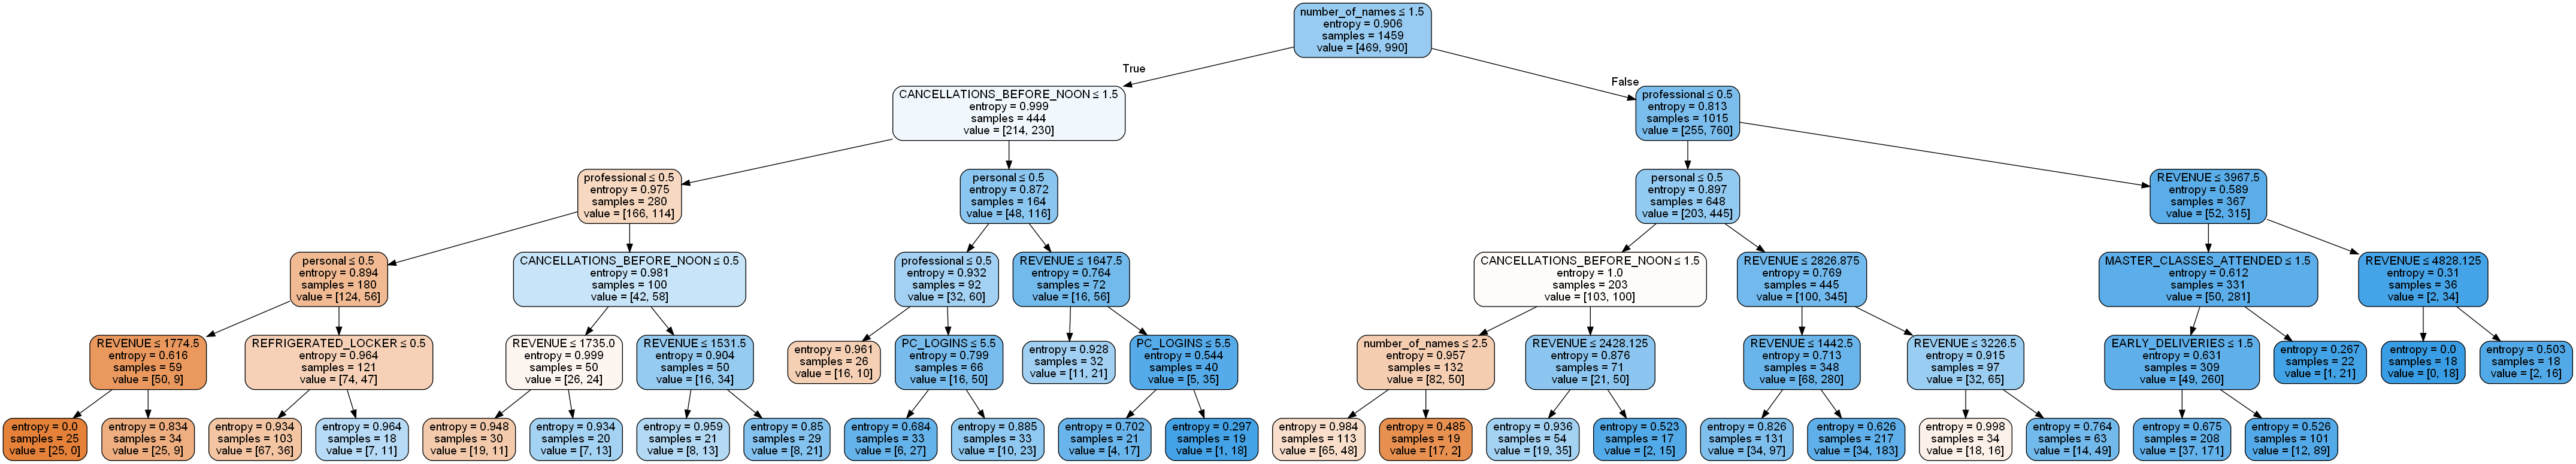

In [18]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 5,
                                     min_samples_leaf = 17,
                                     criterion = 'entropy',
                                     random_state = 219)

# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(X_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(X_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(X_test, y_test).round(4)   # accuracy

# saving AUC
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")

# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = pruned_tree_pred))

# calling display_tree
display_tree(tree       = pruned_tree_fit,
             feature_df = X_train)

<ipython-input-17-50b9299a1379>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


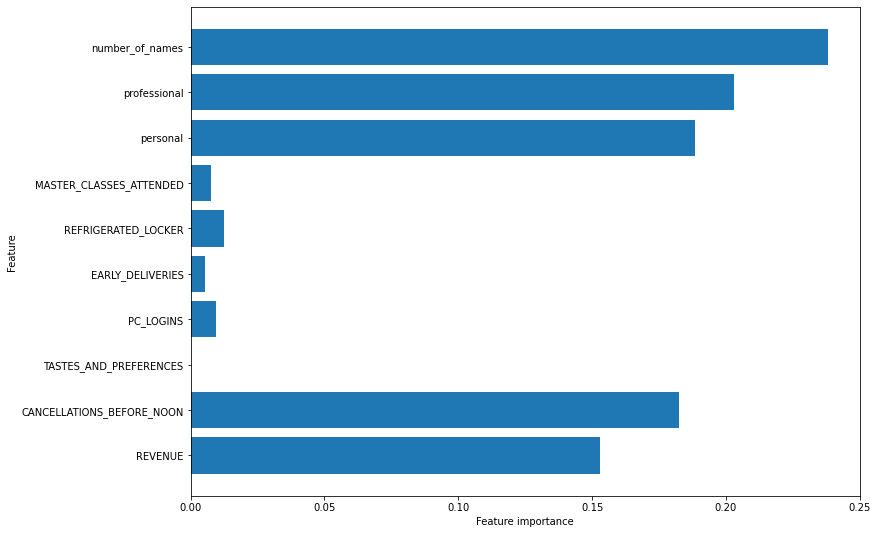

In [19]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train  = X_train,
                         export = False)

### KNN Classification Modeling

In [20]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1

########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()


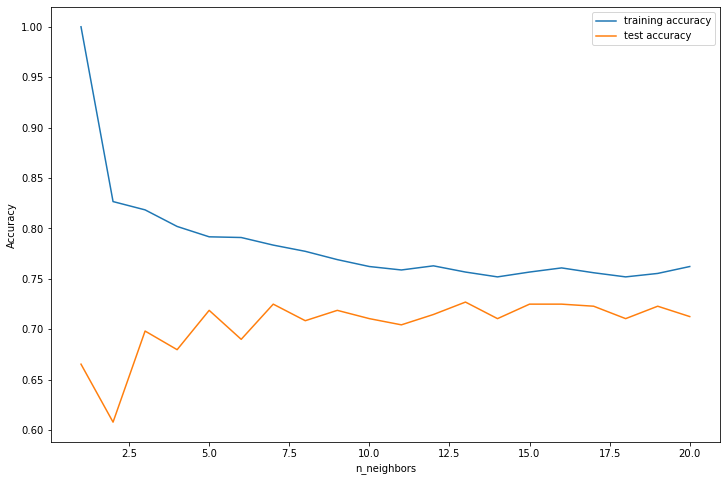

The optimal number of neighbors is: 13


In [21]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data        = apprenticechef_data,
                                  y_data        = apprenticechef_target,
                                  response_type = 'class')

In [22]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(apprenticechef_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(apprenticechef_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            apprenticechef_target,
            random_state = 219,
            test_size = 0.25,
            stratify = apprenticechef_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(X_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(X_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

# unpacking the confusion matrix
knn_class_tn, \
knn_class_fp, \
knn_class_fn, \
knn_class_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_class_tn}
False Positives: {knn_class_fp}
False Negatives: {knn_class_fn}
True Positives : {knn_class_tp}
""")

# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = knn_pred))


Training ACCURACY: 0.7608
Testing  ACCURACY: 0.729
AUC Score        : 0.6193

True Negatives : 49
False Positives: 107
False Negatives: 25
True Positives : 306

[[ 49 107]
 [ 25 306]]


## Ensemble Modeling

### Random Forest

Training ACCURACY: 0.8115
Testing  ACCURACY: 0.7885
AUC Score        : 0.7038

True Negatives : 73
False Positives: 83
False Negatives: 20
True Positives : 311

[[ 73  83]
 [ 20 311]]


<ipython-input-17-50b9299a1379>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


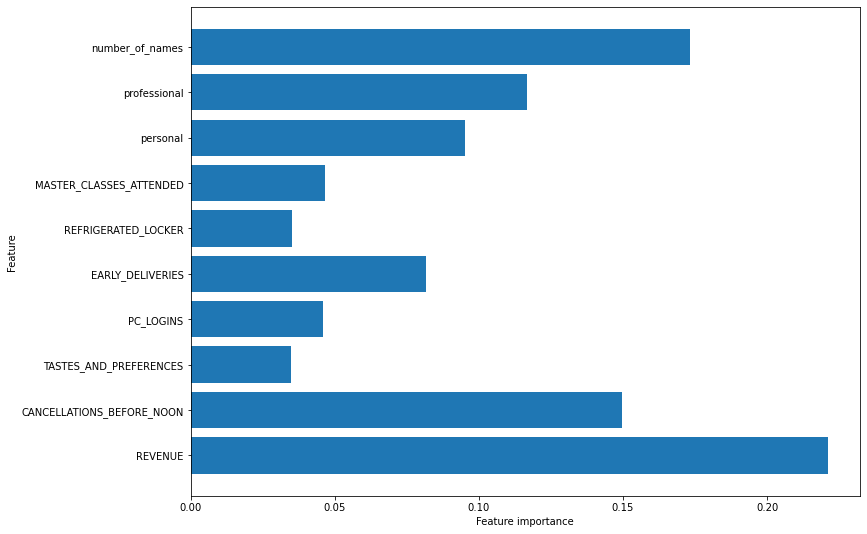

In [23]:
# INSTANTIATING a random forest model with hyperparameters tuned values
random_forest = RandomForestClassifier(n_estimators     = 350,
                                       criterion        = 'gini',
                                       max_depth        = 7,
                                       max_features     = 'auto',
                                       min_samples_leaf = 1,
                                       bootstrap        = True,
                                       warm_start       = True,
                                       random_state     = 219)

# FITTING the training data
random_forest_fit = random_forest.fit(X_train, y_train)


# PREDICTING based on the testing set
random_forest_fit_pred = random_forest_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', random_forest_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', random_forest_fit.score(X_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = random_forest_fit_pred).round(4))

# declaring model performance objects
rf_train_score = random_forest_fit.score(X_train, y_train).round(4)
rf_test_score  = random_forest_fit.score(X_test, y_test).round(4)
rf_auc_score   = roc_auc_score(y_true  = y_test,
                               y_score = random_forest_fit_pred).round(4)

# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = random_forest_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")

# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = random_forest_fit_pred))

# plotting feature importances
plot_feature_importances(random_forest_fit,
                         train = X_train,
                         export = False)

### Gradient Boosted Machines

In [24]:
# INSTANTIATING the model object without hyperparameters
gbm = GradientBoostingClassifier(loss          = 'deviance',
                                 learning_rate = 0.1,
                                 n_estimators  = 100,
                                 criterion     = 'friedman_mse',
                                 max_depth     = 2,
                                 warm_start    = False,
                                 random_state  = 219)

# FIT step is needed as we are not using .best_estimator
gbm_fit = gbm.fit(X_train, y_train)


# PREDICTING based on the testing set
gbm_pred = gbm_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', gbm_fit.score(X_train, y_train).round(4))
print('Testing ACCURACY :', gbm_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_pred).round(4))

# declaring model performance objects
gbm_train_score = gbm_fit.score(X_train, y_train).round(4)
gbm_test_score  = gbm_fit.score(X_test, y_test).round(4)
gbm_auc_score   = roc_auc_score(y_true = y_test,
                               y_score = gbm_pred).round(4)

# unpacking the confusion matrix
gbm_tn, \
gbm_fp, \
gbm_fn, \
gbm_tp = confusion_matrix(y_true = y_test, y_pred = gbm_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tn}
False Positives: {gbm_fp}
False Negatives: {gbm_fn}
True Positives : {gbm_tp}
""")

# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = gbm_pred))

Training ACCURACY: 0.7704
Testing ACCURACY : 0.7741
AUC Score        : 0.6966

True Negatives : 75
False Positives: 81
False Negatives: 29
True Positives : 302

[[ 75  81]
 [ 29 302]]


## Summarize model results

In [25]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP         Final model
-----         ---------      --------------         -----------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}      No
KNN Class     {knn_auc_score}         {knn_class_tn, knn_class_fp, knn_class_fn, knn_class_tp}      No
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}       Yes
Random Forest {rf_auc_score}         {rf_tn, rf_fp, rf_fn, rf_tp}       No
GBM           {gbm_auc_score}         {gbm_tn, gbm_fp, gbm_fn, gbm_tp}       No
""")


# creating a dictionary for model results
model_performance = {

    'Final Model'   : ['No', 'No', 'Yes', 'No', 'No'],
    
    'Model Name'    : ['Logistic', 'KNN Class', 'Pruned Tree', 'Random Forest', 'GBM'],
           
    'AUC Score' : [logreg_auc_score, knn_auc_score, pruned_tree_auc_score, 
                   rf_auc_score, gbm_auc_score],
    
    'Training Accuracy' : [logreg_train_score,
                           knn_train_score,
                           pruned_tree_train_score,
                           rf_train_score,
                           gbm_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, 
                           knn_test_score,
                           pruned_tree_test_score,
                           rf_test_score,
                           gbm_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (knn_class_tn, knn_class_fp, knn_class_fn, knn_class_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                           (rf_tn, rf_fp, rf_fn, rf_tp),
                           (gbm_tn, gbm_fp, gbm_fn, gbm_tp)]}

# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

# sending model results to Excel
model_performance.to_excel('./model_results/classification_model_performance.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP         Final model
-----         ---------      --------------         -----------
Logistic      0.6366         (53, 103, 22, 309)      No
KNN Class     0.6193         (49, 107, 25, 306)      No
Pruned Tree   0.7263         (89, 67, 39, 292)       Yes
Random Forest 0.7038         (73, 83, 20, 311)       No
GBM           0.6966         (75, 81, 29, 302)       No



In [26]:
########################################
# checking model performances
########################################
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

Final Model     Model Name  AUC Score  Training Accuracy  Testing Accuracy    Confusion Matrix
2         Yes    Pruned Tree     0.7263             0.7608            0.7823   (89, 67, 39, 292)
3          No  Random Forest     0.7038             0.8115            0.7885   (73, 83, 20, 311)
4          No            GBM     0.6966             0.7704            0.7741   (75, 81, 29, 302)
0          No       Logistic     0.6366             0.7149            0.7433  (53, 103, 22, 309)
1          No      KNN Class     0.6193             0.7608            0.7290  (49, 107, 25, 306)